In [1]:
import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import models,layers,callbacks
from tensorflow.keras.utils import to_categorical,plot_model
import matplotlib.pyplot as plt
from sklearn import metrics

In [2]:
galaxies = pd.read_csv('/Users/qyq/Development/Python天文培训/galaxy_standardised.csv')
qsos = pd.read_csv('/Users/qyq/Development/Python天文培训/qso_standardised.csv')
spectras = galaxies.append(qsos)

In [3]:
spectras= shuffle(spectras)
spectras.head()

,0,1,2,3,4,5,6,7,8,9,...,2541,2542,2543,2544,2545,2546,2547,2548,2549,type
1776,0.124539,0.222687,0.342530,0.360026,0.442875,0.361010,0.362580,0.302777,0.409731,0.321449,...,1.095233,1.169790,1.114909,1.061770,1.067428,1.090893,1.096585,1.105822,1.104391,2
1335,1.352610,1.462036,2.058104,2.221901,2.735838,2.525651,2.359686,2.625069,2.731756,2.309699,...,0.835168,-0.386780,-0.931357,-0.162507,-1.009904,0.170656,0.550582,-0.066903,-0.739039,3
1952,2.219312,2.269001,0.866826,2.033384,1.782886,1.903432,1.094329,0.791041,1.657742,2.115496,...,0.479282,0.522365,0.961757,-0.278108,0.272253,0.545900,0.500192,0.628234,0.601944,3
782,0.099444,0.317658,0.467348,0.267959,0.027787,0.585965,0.522003,0.365505,0.276678,0.504667,...,0.929329,0.923704,0.955737,0.852391,0.877171,0.933622,1.025533,0.986764,0.986192,2
825,1.003490,2.324112,0.671035,1.836727,1.783568,1.335936,0.624369,2.675381,4.753156,0.426306,...,1.063648,1.756834,0.155706,1.434980,-0.560429,0.413189,1.411822,0.896279,0.442270,3


In [4]:
spectras.loc[spectras['type'] == 2,'type'] = 0 # galaxy
spectras.loc[spectras['type'] == 3,'type'] = 1 # qso

In [5]:
spectras.head()

,0,1,2,3,4,5,6,7,8,9,...,2541,2542,2543,2544,2545,2546,2547,2548,2549,type
1776,0.124539,0.222687,0.342530,0.360026,0.442875,0.361010,0.362580,0.302777,0.409731,0.321449,...,1.095233,1.169790,1.114909,1.061770,1.067428,1.090893,1.096585,1.105822,1.104391,0
1335,1.352610,1.462036,2.058104,2.221901,2.735838,2.525651,2.359686,2.625069,2.731756,2.309699,...,0.835168,-0.386780,-0.931357,-0.162507,-1.009904,0.170656,0.550582,-0.066903,-0.739039,1
1952,2.219312,2.269001,0.866826,2.033384,1.782886,1.903432,1.094329,0.791041,1.657742,2.115496,...,0.479282,0.522365,0.961757,-0.278108,0.272253,0.545900,0.500192,0.628234,0.601944,1
782,0.099444,0.317658,0.467348,0.267959,0.027787,0.585965,0.522003,0.365505,0.276678,0.504667,...,0.929329,0.923704,0.955737,0.852391,0.877171,0.933622,1.025533,0.986764,0.986192,0
825,1.003490,2.324112,0.671035,1.836727,1.783568,1.335936,0.624369,2.675381,4.753156,0.426306,...,1.063648,1.756834,0.155706,1.434980,-0.560429,0.413189,1.411822,0.896279,0.442270,1


In [6]:
# train, test = train_test_split(spectras, test_size=0.2)
# train, val = train_test_split(train, test_size=0.2)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(spectras.iloc[:,0:2550],spectras['type'], test_size=0.2, random_state=0)

In [8]:
X_train, X_val, y_train, y_val = train_test_split(X_train.iloc[:,0:2550],y_train, test_size=0.2, random_state=0)

In [9]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [10]:
X_val = X_val.values
y_val = y_val.values

In [11]:
X_train.shape, y_train.shape

((2560, 2550), (2560,))

In [12]:
y_train=to_categorical(y_train)
y_val=to_categorical(y_val)
y_test = to_categorical(y_test)

In [13]:
y_train.shape

(2560, 2)

In [14]:
y_train

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [15]:
X_train= X_train.reshape((-1, 2550, 1)).astype("float64") # reshape(): One shape dimension can be -1. In this case, the value is inferred from the length of the array and remaining dimensions.
X_test = X_test.reshape((-1, 2550, 1)).astype("float64")

In [16]:
X_train.shape

(2560, 2550, 1)

In [17]:
X_val = X_val.reshape((-1, 2550, 1)).astype("float64")

In [18]:
model = models.Sequential()
model.add(layers.Conv1D(filters=32, kernel_size=5, activation='relu', input_shape=(2550,1)))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Conv1D(filters=32, kernel_size=5, activation='relu'))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Flatten())
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

In [19]:
model.layers

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 2546, 32)          192       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 1273, 32)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1269, 32)          5152      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 634, 32)           0         
_________________________________________________________________
flatten (Flatten)            (None, 20288)             0         
_________________________________________________________________
dense (Dense)                (None, 16)                324624    
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 3

In [21]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [22]:
history=model.fit(X_train,y_train,epochs=10,batch_size=32, validation_data=(X_val,y_val))

Epoch 1/10
80/80 [==============================] - 6s 72ms/step - loss: 0.5929 - accuracy: 0.7970 - val_loss: 0.3479 - val_accuracy: 0.9094
Epoch 2/10
80/80 [==============================] - 5s 61ms/step - loss: 0.2066 - accuracy: 0.9304 - val_loss: 0.3071 - val_accuracy: 0.9156
Epoch 3/10
80/80 [==============================] - 5s 63ms/step - loss: 0.1926 - accuracy: 0.9511 - val_loss: 0.3299 - val_accuracy: 0.9281
Epoch 4/10
80/80 [==============================] - 5s 64ms/step - loss: 0.1251 - accuracy: 0.9659 - val_loss: 0.3648 - val_accuracy: 0.9266
Epoch 5/10
80/80 [==============================] - 5s 63ms/step - loss: 0.0964 - accuracy: 0.9670 - val_loss: 0.3440 - val_accuracy: 0.9172
Epoch 6/10
80/80 [==============================] - 5s 65ms/step - loss: 0.0908 - accuracy: 0.9741 - val_loss: 0.4299 - val_accuracy: 0.9094
Epoch 7/10
80/80 [==============================] - 5s 67ms/step - loss: 0.0703 - accuracy: 0.9803 - val_loss: 0.4322 - val_accuracy: 0.9141
Epoch 8/10
80

In [23]:
history=model.fit(X_train,y_train,epochs=20,batch_size=32, validation_data=(X_val,y_val),callbacks=[
        callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    ])

Epoch 1/20
80/80 [==============================] - 5s 65ms/step - loss: 0.0374 - accuracy: 0.9887 - val_loss: 1.4521 - val_accuracy: 0.9125
Epoch 2/20
80/80 [==============================] - 5s 62ms/step - loss: 0.0326 - accuracy: 0.9914 - val_loss: 1.3334 - val_accuracy: 0.9047
Epoch 3/20
80/80 [==============================] - 5s 63ms/step - loss: 0.0276 - accuracy: 0.9930 - val_loss: 2.2320 - val_accuracy: 0.9125
Epoch 4/20
80/80 [==============================] - 5s 65ms/step - loss: 0.0228 - accuracy: 0.9941 - val_loss: 2.6340 - val_accuracy: 0.9141
Epoch 5/20
80/80 [==============================] - 5s 67ms/step - loss: 3.3504 - accuracy: 0.9918 - val_loss: 0.9221 - val_accuracy: 0.9109
Epoch 6/20
80/80 [==============================] - 5s 66ms/step - loss: 0.0109 - accuracy: 0.9961 - val_loss: 1.6339 - val_accuracy: 0.9094
Epoch 7/20
80/80 [==============================] - 5s 65ms/step - loss: 0.0141 - accuracy: 0.9969 - val_loss: 2.6557 - val_accuracy: 0.9125
Epoch 8/20
80

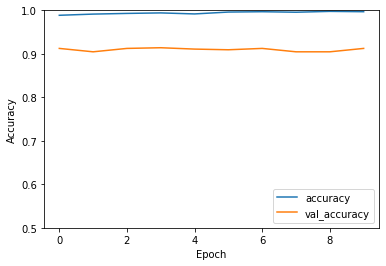

In [24]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [25]:
test_loss, test_acc = model.evaluate(X_test,y_test, verbose=2)

25/25 - 0s - loss: 2.2155 - accuracy: 0.9300


In [26]:
print(test_acc)

0.9300000071525574


In [27]:
predictions = model.predict(X_test)

In [28]:
predictions

array([[4.0654236e-10, 1.0000000e+00],
       [1.4456008e-03, 9.9855441e-01],
       [1.1474931e-10, 1.0000000e+00],
       ...,
       [7.7722941e-12, 1.0000000e+00],
       [9.7689012e-10, 1.0000000e+00],
       [5.7999949e-10, 1.0000000e+00]], dtype=float32)

In [29]:
y_pred = model.predict_classes(X_test)

In [30]:
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,

In [31]:
model.save('cnn_model')

INFO:tensorflow:Assets written to: cnn_model/assets


In [32]:
model = tf.keras.models.load_model('cnn_model') # due to issuse with pyh5 == 3.0.0, can't load h5 format

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 2546, 32)          192       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 1273, 32)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1269, 32)          5152      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 634, 32)           0         
_________________________________________________________________
flatten (Flatten)            (None, 20288)             0         
_________________________________________________________________
dense (Dense)                (None, 16)                324624    
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 3

In [34]:
metrics.roc_auc_score(y_test,predictions)

0.9456815748445629